In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors= 'coerce')

In [10]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [11]:
df.describe

<bound method NDFrame.describe of         fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0             40.738354         -73.999512         40.723217                1  
1

In [12]:
df.shape

(200000, 7)

In [13]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [15]:
df = df.drop('pickup_datetime', axis = 1)

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

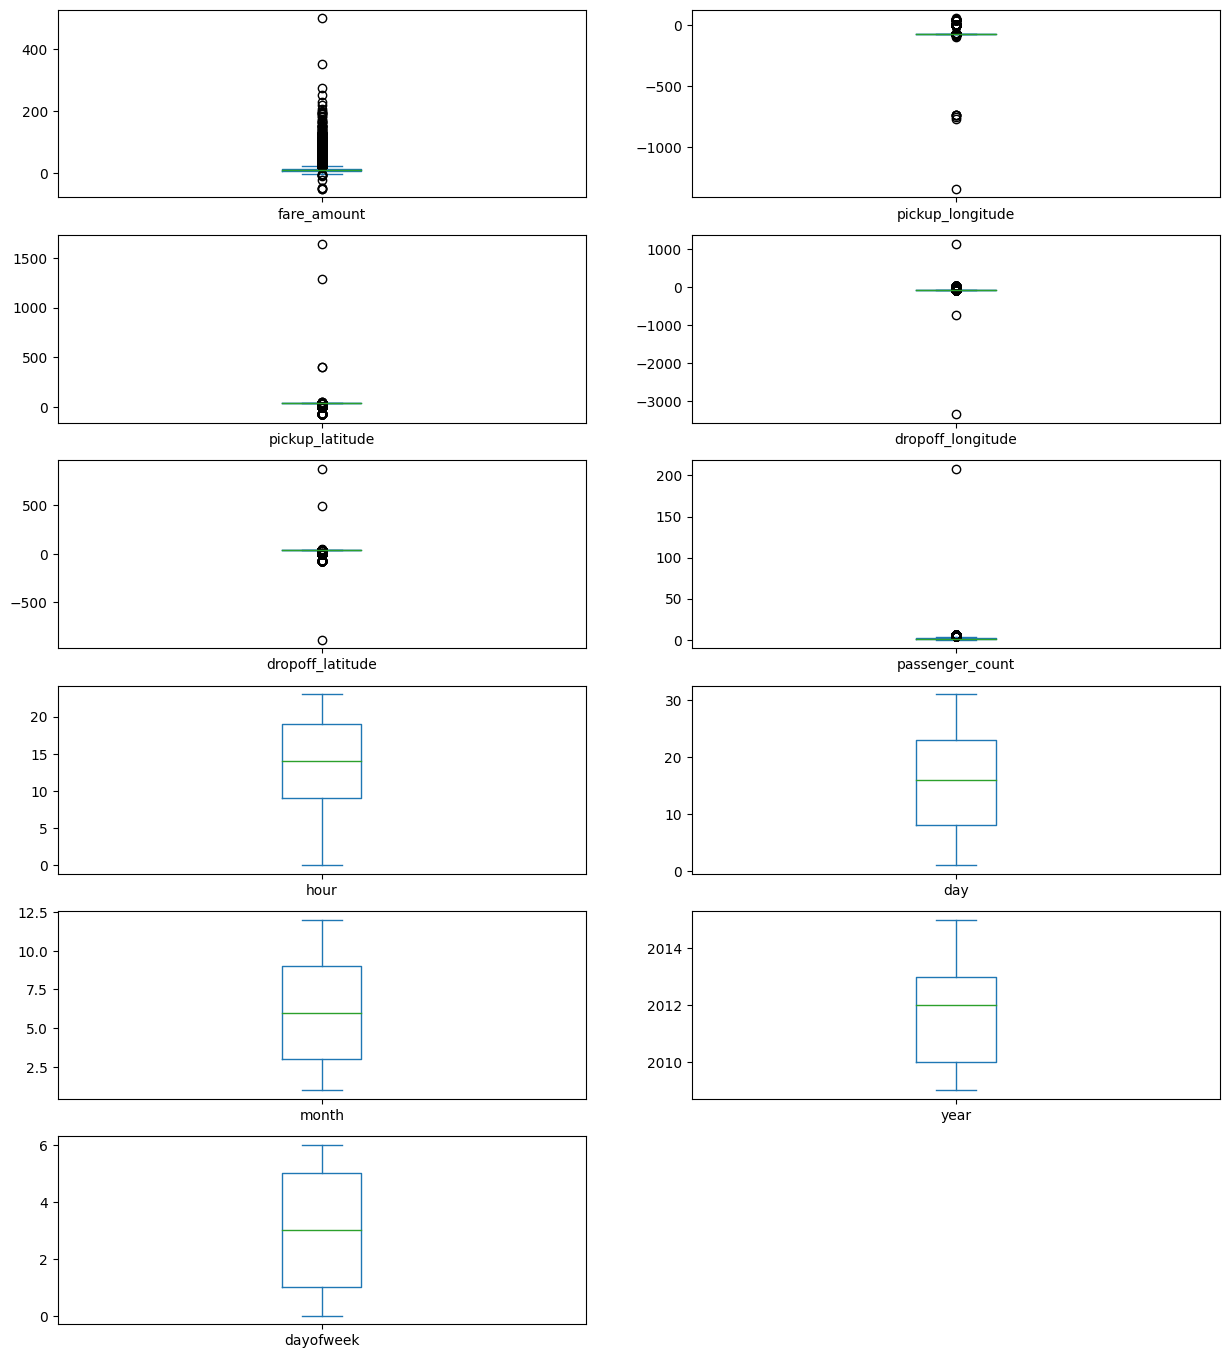

In [17]:
df.plot(kind = "box", subplots = True, layout = (7, 2), figsize = (15, 20))

In [18]:
def removeOutliers(df1, col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR
  df[col] = np.clip(df1[col], lower_whisker, upper_whisker)

def treat_all_outliers(df1, colList):
  for c in colList:
    df1 = removeOutliers(df, c)
    return df1



In [19]:
df = treat_all_outliers(df, df.iloc[:, 0::])

In [21]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

AttributeError: ignored